In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import string
import matplotlib.style as style
style.use('seaborn-colorblind')
from matplotlib import cm
from filter_inference import calculate_corr_all
import seaborn as sns
# simulation
from main import simulate_spk_train, load_spk_train
from filter_inference import infer_J_ij
from cov_mle import cov_parallel
import os


LOAD_DATA = False

## Figure 1. Schematic of hidden neuron probelm and inferred neuronal connection vs. covariance

In [8]:
# simulation
from main import simulate_spk_train, load_spk_train
from filter_inference import infer_J_ij

LOAD_DATA = False
N, Nt = 64, 2000000
weight_factor = 2
baseline = -2


N_i, N_j = 0, 0
dp = 1
obs = 1

if LOAD_DATA:
    print("Loading inferred filters...")
    inferred_no_basis = np.loadtxt("./figure_data/2022-10-25_MLE/J_0_0_1_observed_1000000_data_no_basis.txt")
    inferred_with_basis = np.loadtxt("./figure_data/2022-10-25_MLE/J_0_0_1_observed_1000000_data_3_basis.txt")
    print("Inferred filter loaded!")
else:
    print("Loading spike train data...")
    spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
    print("Spike train loaded!")
    firing_mean = np.mean(spk_train.spike_train)
    
    inferred_no_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, \
                                   with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8)
    inferred_with_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, \
                                     with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8)

Loading spike train data...
Spike train loaded!
inferring with 2000000 data and 1 observed neurons without basis...
design shape: (2000000, 100)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 7.61 s
inferring with 2000000 data and 1 observed neurons with basis order [0, 1, 2]...
Time took for MLE 4.80 s


In [218]:
firing_mean/0.1

0.15063140625

In [11]:
# w_true = spk_train.weight_matrix
# np.savetxt("./figure_data/weight_matrix_ground_truth.txt", w_true)
w_true = np.loadtxt("./figure_data/weight_matrix_ground_truth.txt")

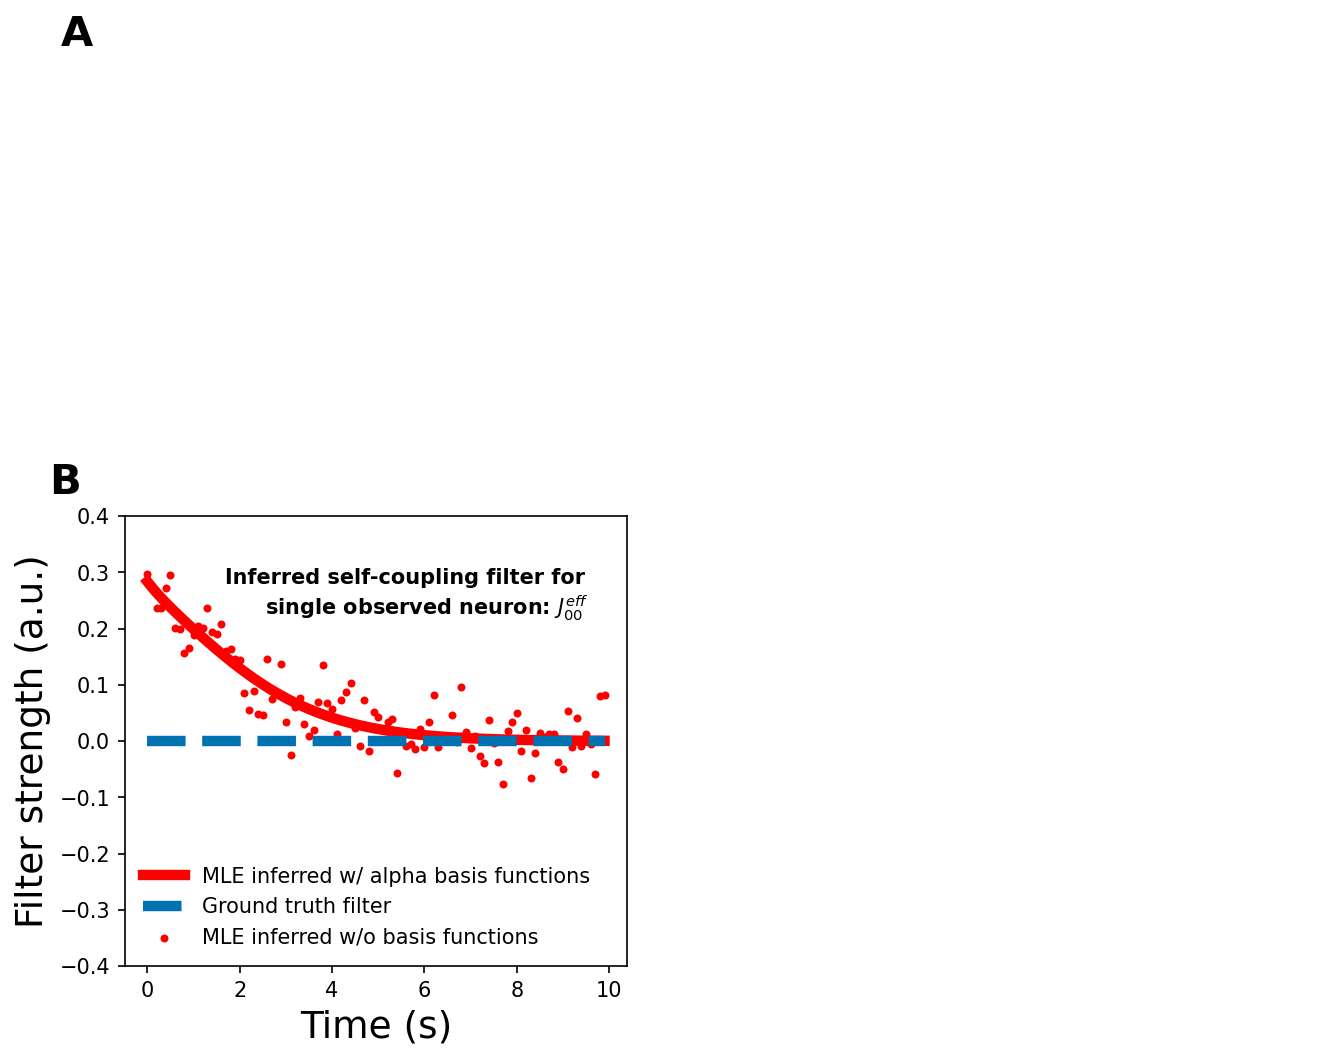

In [25]:
# 2m data
fig = plt.figure(constrained_layout=False, figsize=(8, 6), dpi=150)

ax_schematic = plt.subplot(gridspec.GridSpec(
    1, 1, left=0.1, right=1, top=1, bottom=0.55, wspace=0,hspace=0)[0, 0])
ax_schematic.text(-0.17, 1.05, "A", transform=ax_schematic.transAxes,
                  size=20, weight='bold')
plt.axis('off')

gs = gridspec.GridSpec(1, 2, width_ratios=[
                       1, 0.05], left=0, right=0.44, top=0.5, bottom=0, wspace=0,hspace=0)
ax = plt.subplot(gs[0, 0])
ax.scatter(np.arange(0,10, 0.1), inferred_no_basis, color='r', s=8, label="MLE inferred w/o basis functions")
ax.plot(np.arange(0,10, 0.1), inferred_with_basis,"-r", lw=5, label="MLE inferred w/ alpha basis functions")
ax.plot(np.arange(0,10, 0.1), [0 for i in range(100)], "--", lw=5, label="Ground truth filter")
ax.set_ylim(-0.4, 0.4)
ax.set_ylabel("Filter strength (a.u.)", size=18)
ax.set_xlabel("Time (s)", size=18)
ax.text(-0.15, 1.05, "B", transform=ax.transAxes,
        size=20, weight='bold')
# Inferred self-coupling filter for 
ax.text(0.2, 0.85, "Inferred self-coupling filter for ", transform=ax.transAxes,
            size=10, weight='bold')
ax.text(0.28, 0.78, r"single observed neuron: $J_{{{}{}}}^{{eff}}$".format(0, 0), transform=ax.transAxes,
            size=10, weight='bold')
ax.legend(frameon=False)

# Phenotype schematic
# gs2 = gridspec.GridSpec(
#     1, 1, width_ratios=[1], left=0.6, right=1, top=0.50, bottom=0, wspace=0,hspace=0)
# ax2 = plt.subplot(gs2[0, 0])
# # noise = np.random.normal(0, 0.2, 5) # reproduction noise, std = 0.2 is for illustration only
# noise = [-0.04801385,  0.09379505, -0.34464689,  0.12703898, -0.41765944]
# hop = [[4, 5, 9, 6, 1], [10, 9, 4, 1, 6], [6, 7, 3, 9, 4], np.array(
#     [4, 5, 9, 6, 1])+noise]  # size of reproduction noise is for illustration purpose only
# # for i in range(3):
# ax2.plot(hop[0], '--o', label='Agent {}'.format(1))
# ax2.plot(hop[1], '--v', label='Agent {}'.format(2))
# ax2.plot(hop[2], '--^', label='Agent {}'.format(3))
# ax2.plot(hop[3], '--s', label='Agent 1 offspring')
# ax2.set_title("Phenotype examples",
#               fontsize=18, pad=10)
# ax2.text(-0.15, 1.05, "C", transform=ax2.transAxes,
#          size=20, weight='bold')
# plt.xticks(np.arange(5), ('$\gamma_1$', r'$\gamma_2$',
#                           r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$'), fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Relocation rate', fontsize=18)
# plt.xlabel('Phenotype component', fontsize=18)
# plt.ylim(-0.5, 10.5)
# plt.legend(loc=3, fontsize=14, frameon=False)

## Figure 2. Correlation between inferred filter and spike train covariance, as # of observed neuron and data volume change

In [204]:
spk_train.spike_train.shape

(1000000, 64)

In [2]:
N, Nt = 64, 2000000
weight_factor = 2
baseline = -2
spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")

LOAD_DATA = True
obs = 3
if LOAD_DATA:
    print("Loading inferred filters...")
    inferred_no_basis_3_3 = [[] for _ in range(3)]
    inferred_with_basis_3_3 = [[] for _ in range(3)]
    for j in range(3):
        for i in range(3):
            inferred_no_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_MLE/J_{i}_{j}_3_observed_2000000_data_no_basis.txt"))
            inferred_with_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_MLE/J_{i}_{j}_3_observed_2000000_data_3_basis.txt"))
    print("Inferred filter loaded!")
else:
    print("Loading spike train data...")
    spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
    print("Spike train loaded!")
    inferred_no_basis_3_3 = []
    inferred_with_basis_3_3 = []
    for N_j in range(obs):
        inferred_no_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8))
        inferred_with_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8))
        
# calculate correlation from spike train
from cov_mle import cov_parallel

# LOAD_DATA = False
obs = 3
if LOAD_DATA:
    cov_3_3 = [[] for _ in range(obs)]
    for j in range(3):
        for i in range(3):
            cov_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_COV/cov_{i}_{j}_2000000"))
else:
    n_neuron = 3
    cov_parallel(spk_train.spike_train, neuron_pairs=[[i, j] for j in range(n_neuron) for i in range(n_neuron)], n_processes=9)

Loading inferred filters...
Inferred filter loaded!


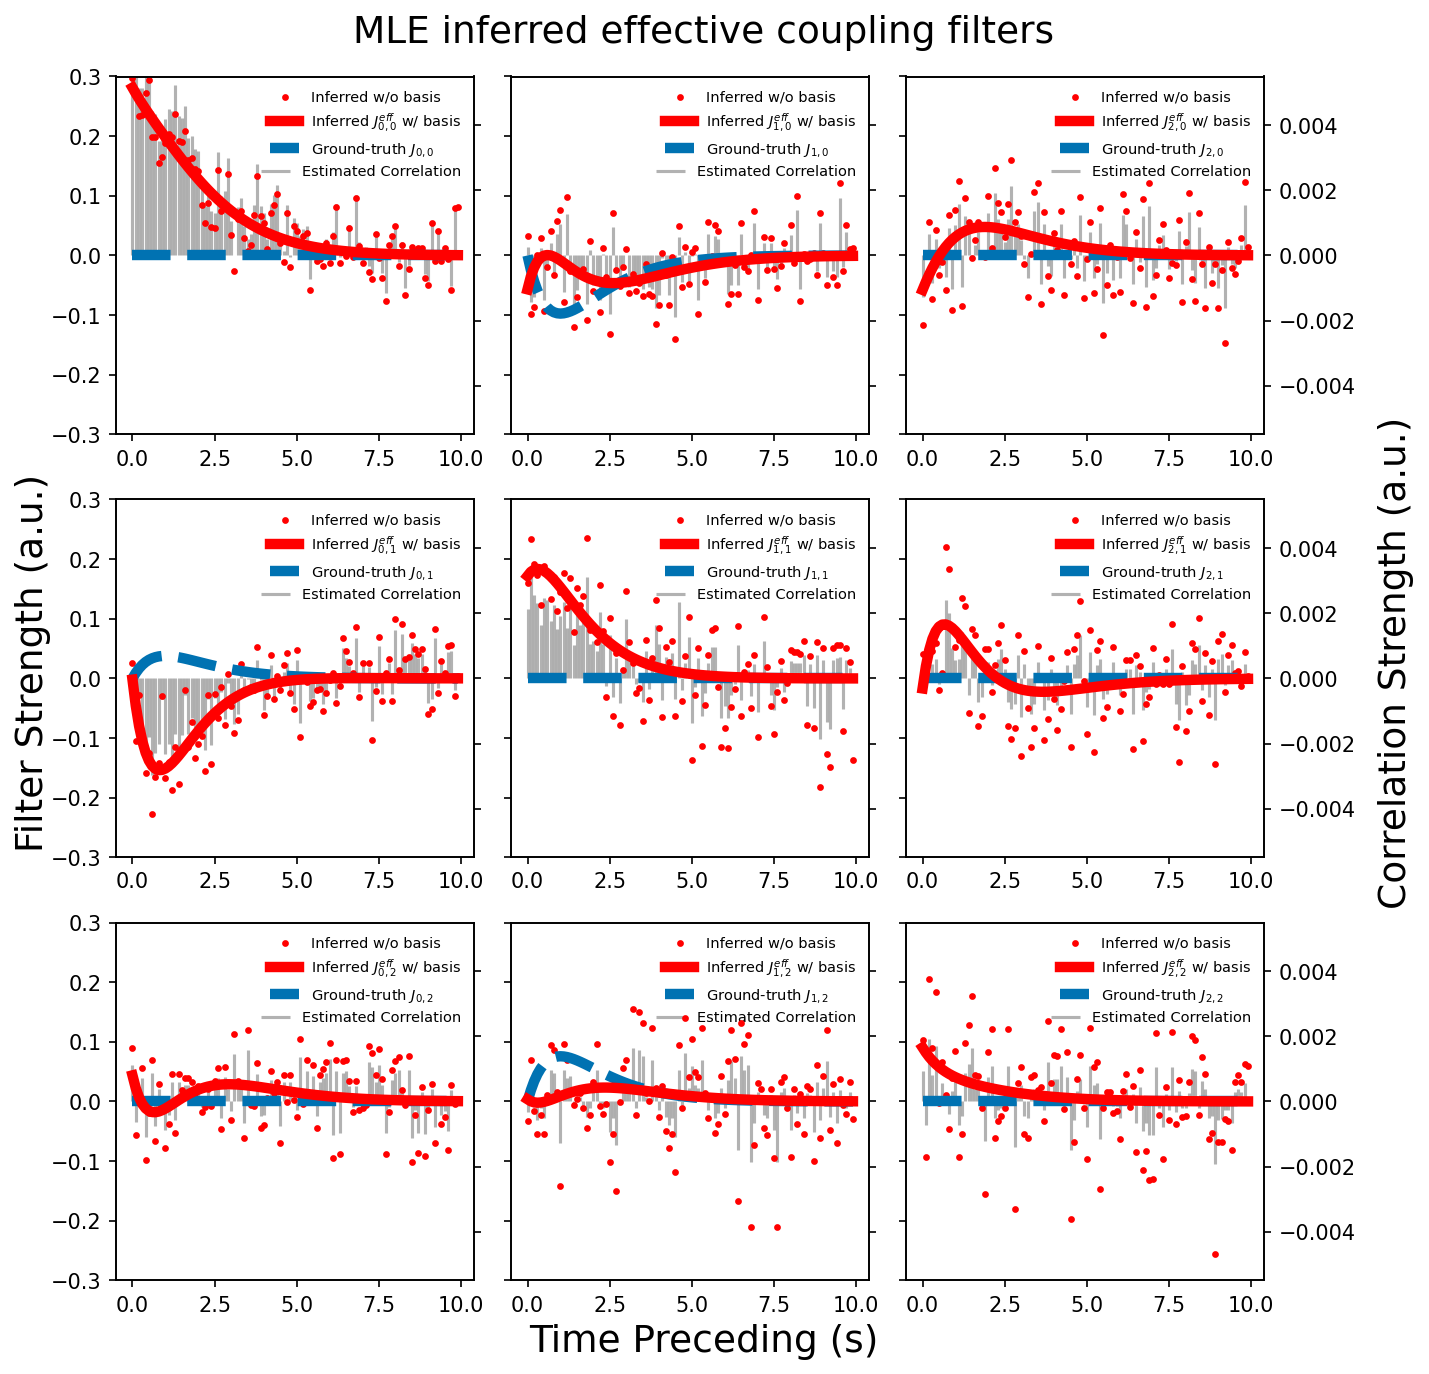

In [4]:
from figure import plot_mle_cov

w_true = np.loadtxt("./figure_data/weight_matrix_ground_truth.txt")
plot_mle_cov(cov_3_3, inferred_with_basis_3_3, inferred_no_basis_3_3, w_true, savefig=False)

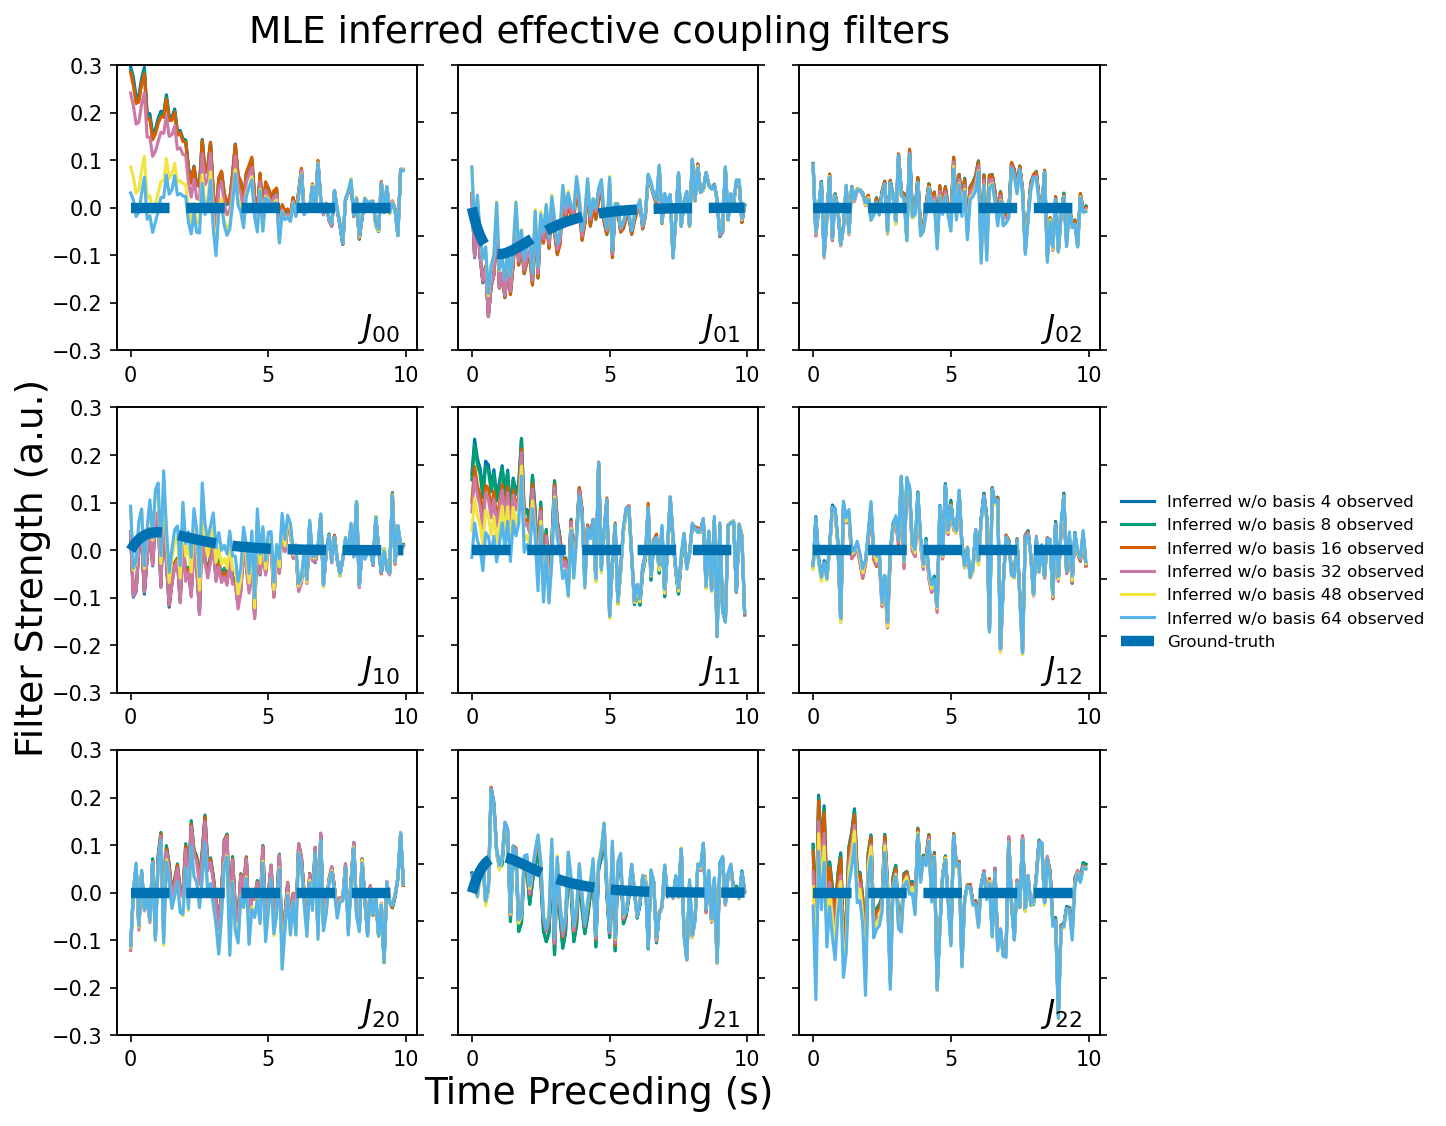

In [2]:
from figure import plot_mle_cov_vary_obs

w_true = np.loadtxt("./figure_data/weight_matrix_ground_truth.txt")
plot_mle_cov_vary_obs(w_true, data_dir="Spk64_2m_Data_volume_obs")

figure saved at './Figures/self_coupling_correlation_2m.pdf'!


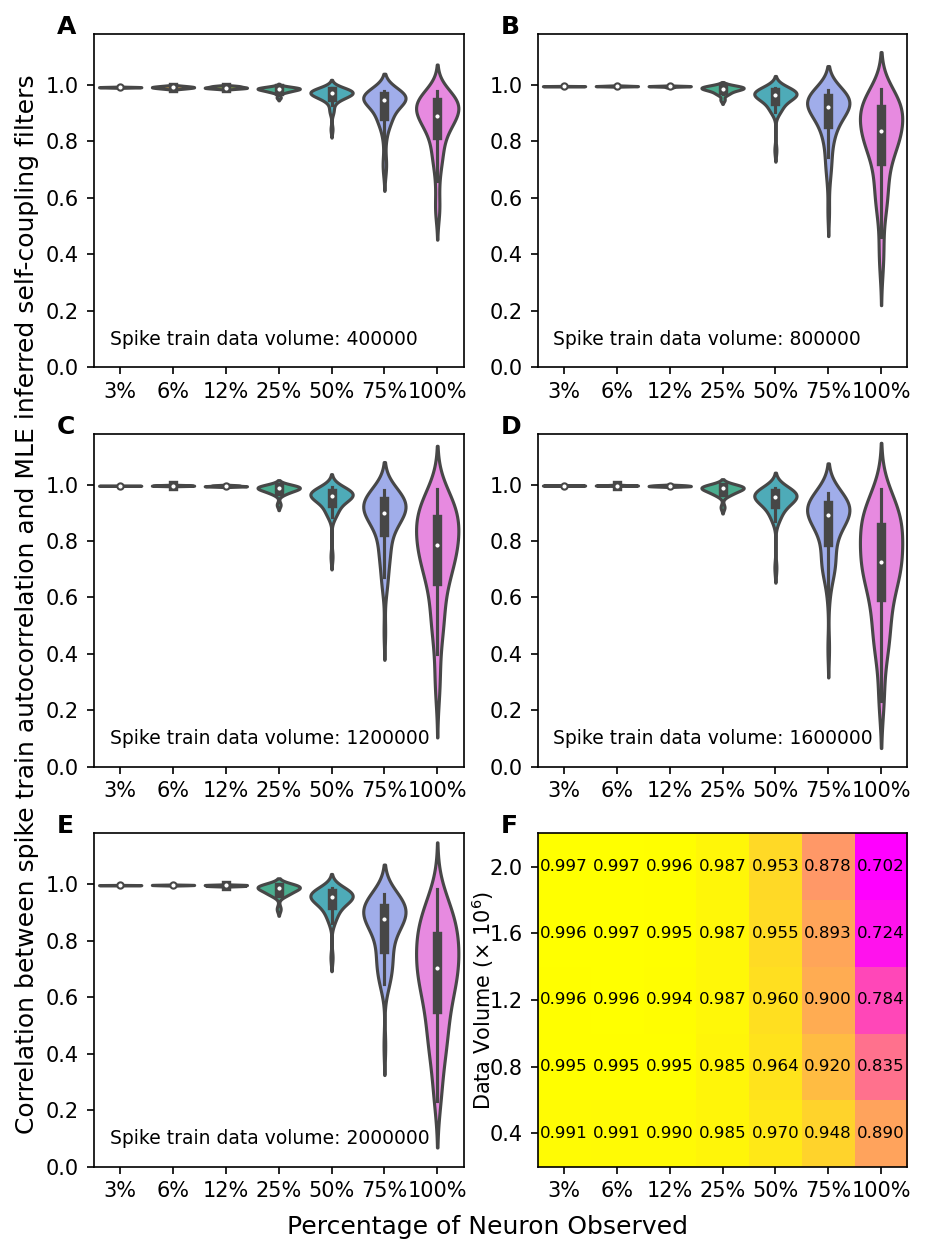

In [9]:
from figure import plot_correlation
# cov and self-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_covariance", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0, 1.18], \
                 fig_name="self_coupling_correlation_2m.pdf", \
                 savefig=savefig)

figure saved at './Figures/cross_coupling_correlation_2m.pdf'!


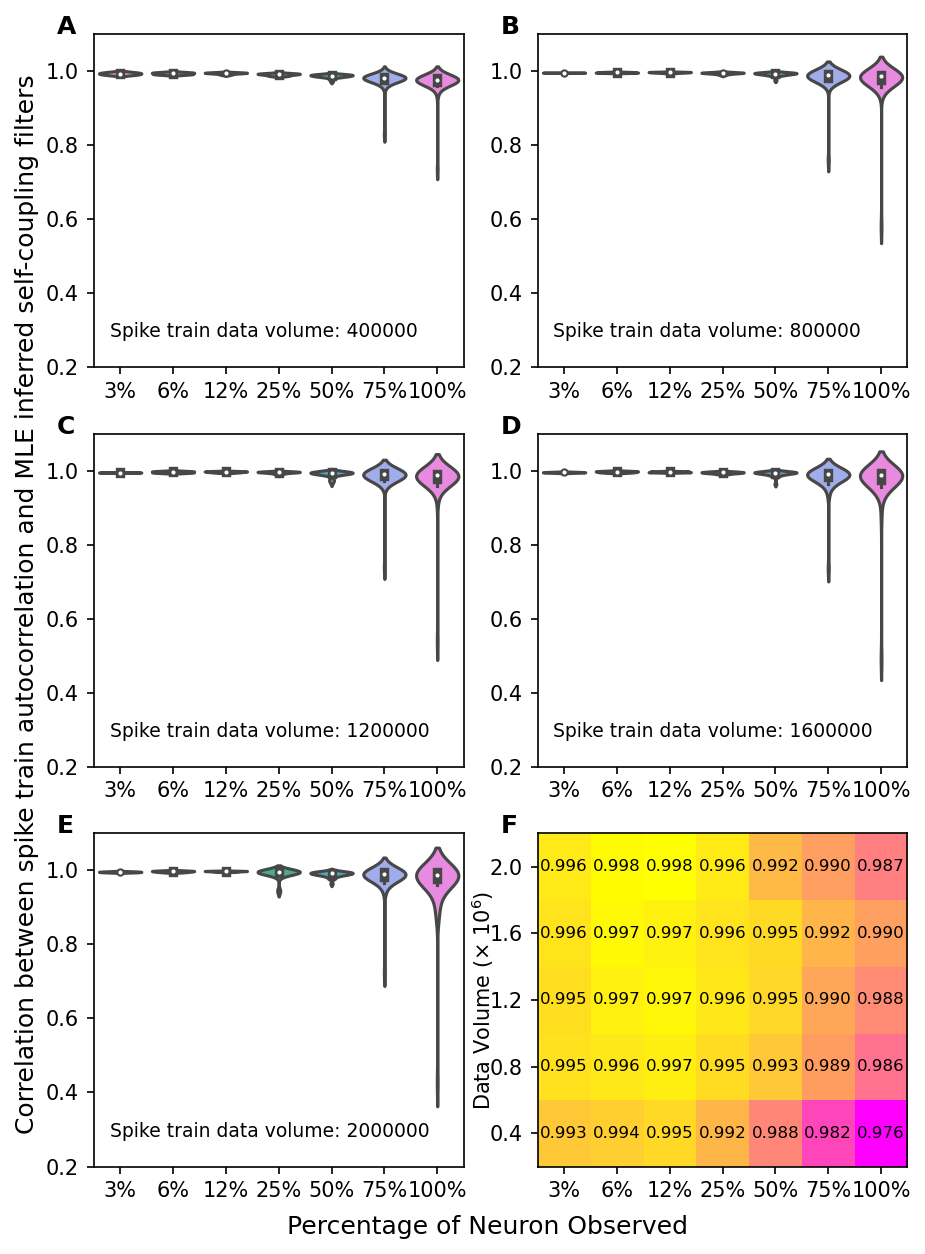

In [11]:
from figure import plot_correlation
# cov and cross-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_covariance", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs", \
                 filter_type="cross-coupling-random", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.2, 1.1], \
                 fig_name="cross_coupling_correlation_2m.pdf", \
                 savefig=savefig)

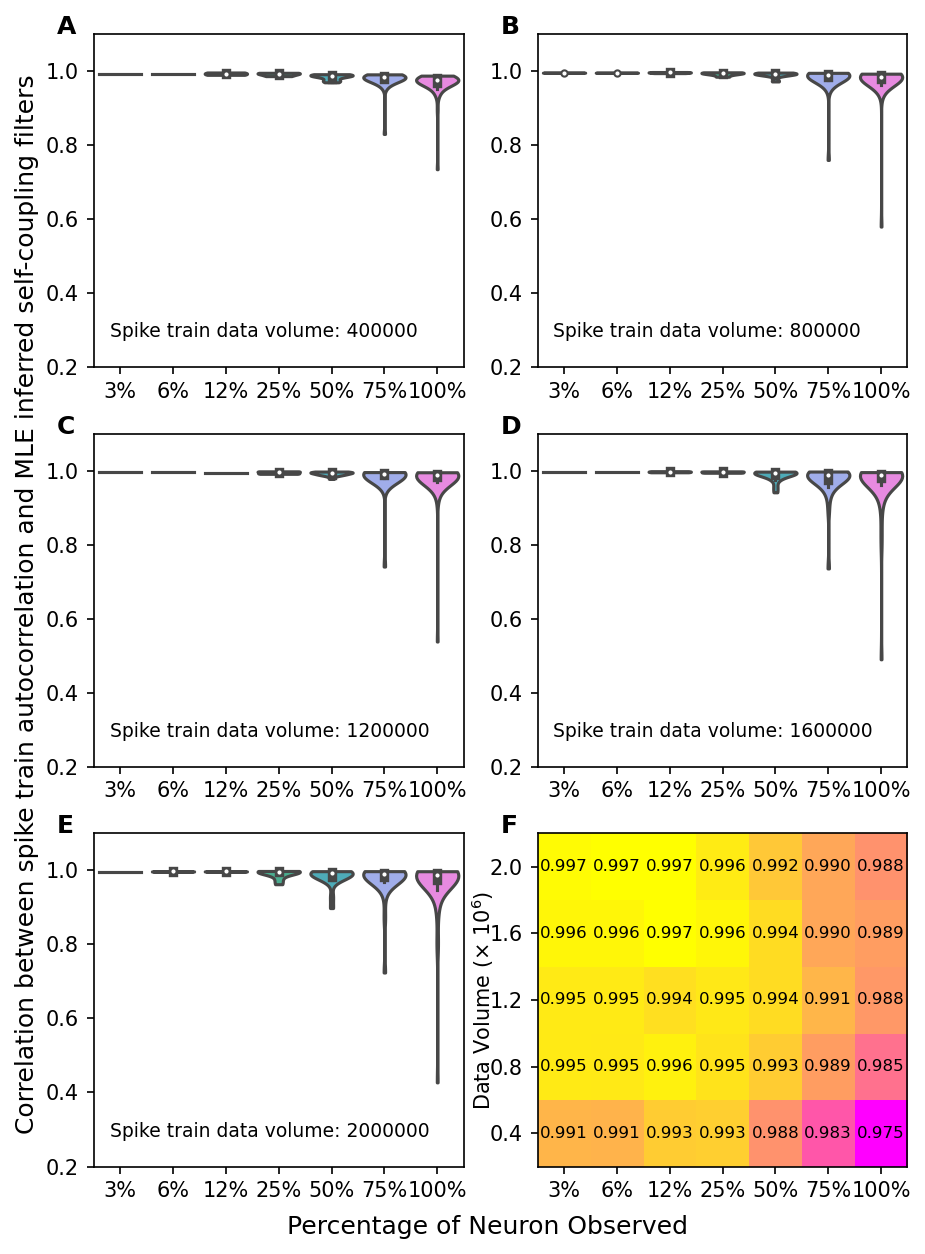

In [2]:
from figure import plot_correlation
# cov and cross-coupling filters; 2m data; choose cross-coupling with ground-truth 0
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_covariance", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs", \
                 filter_type="cross-coupling-zero", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.2, 1.1], \
                 fig_name="cross_coupling_correlation_2m_0_w_true.pdf", \
                 savefig=False)

### -1 diag

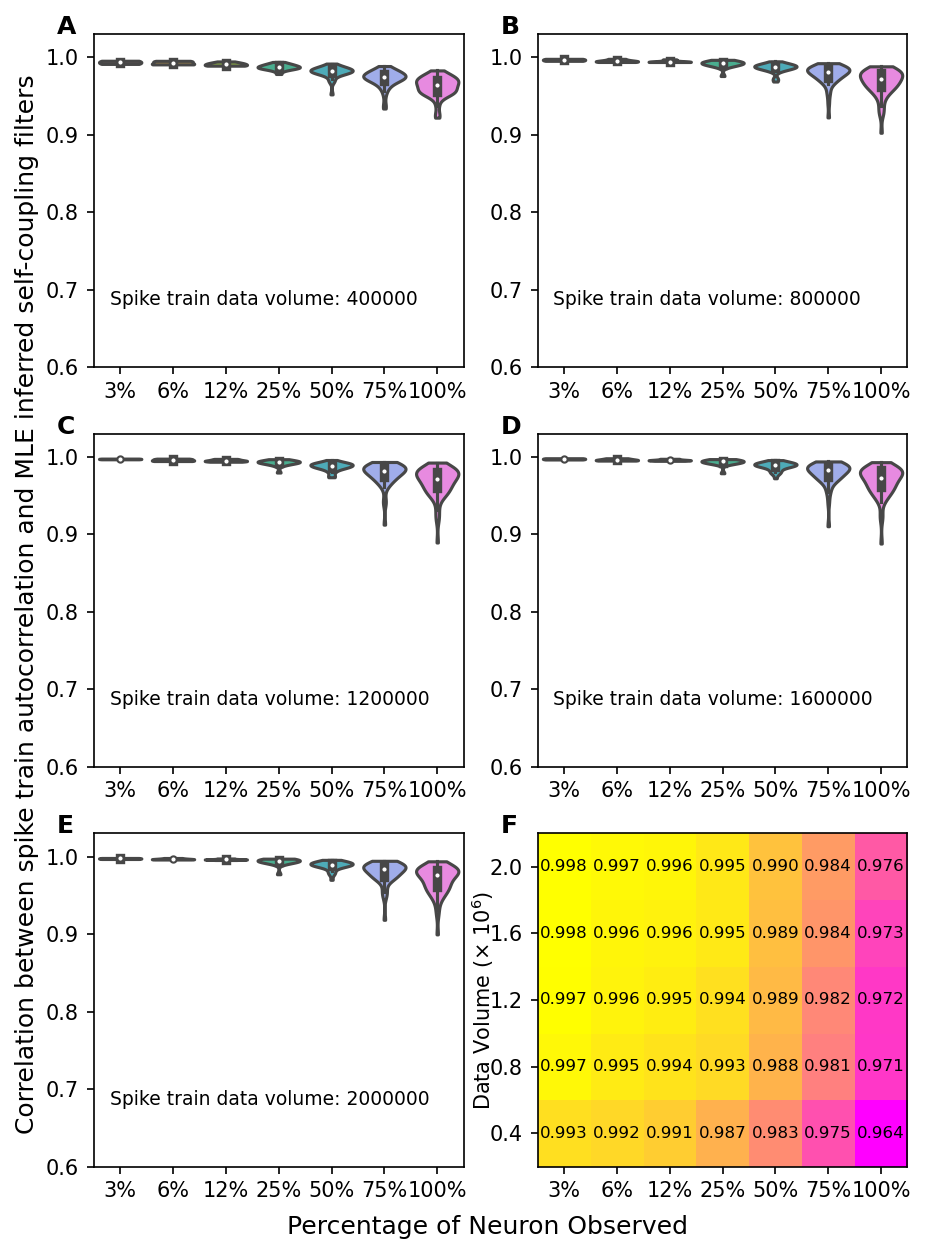

In [13]:
from figure import plot_correlation
# -1 diag, cov and self-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.6, 1.03], \
                 fig_name="self_coupling_correlation_2m_-1_diag.pdf", \
                 savefig=False)

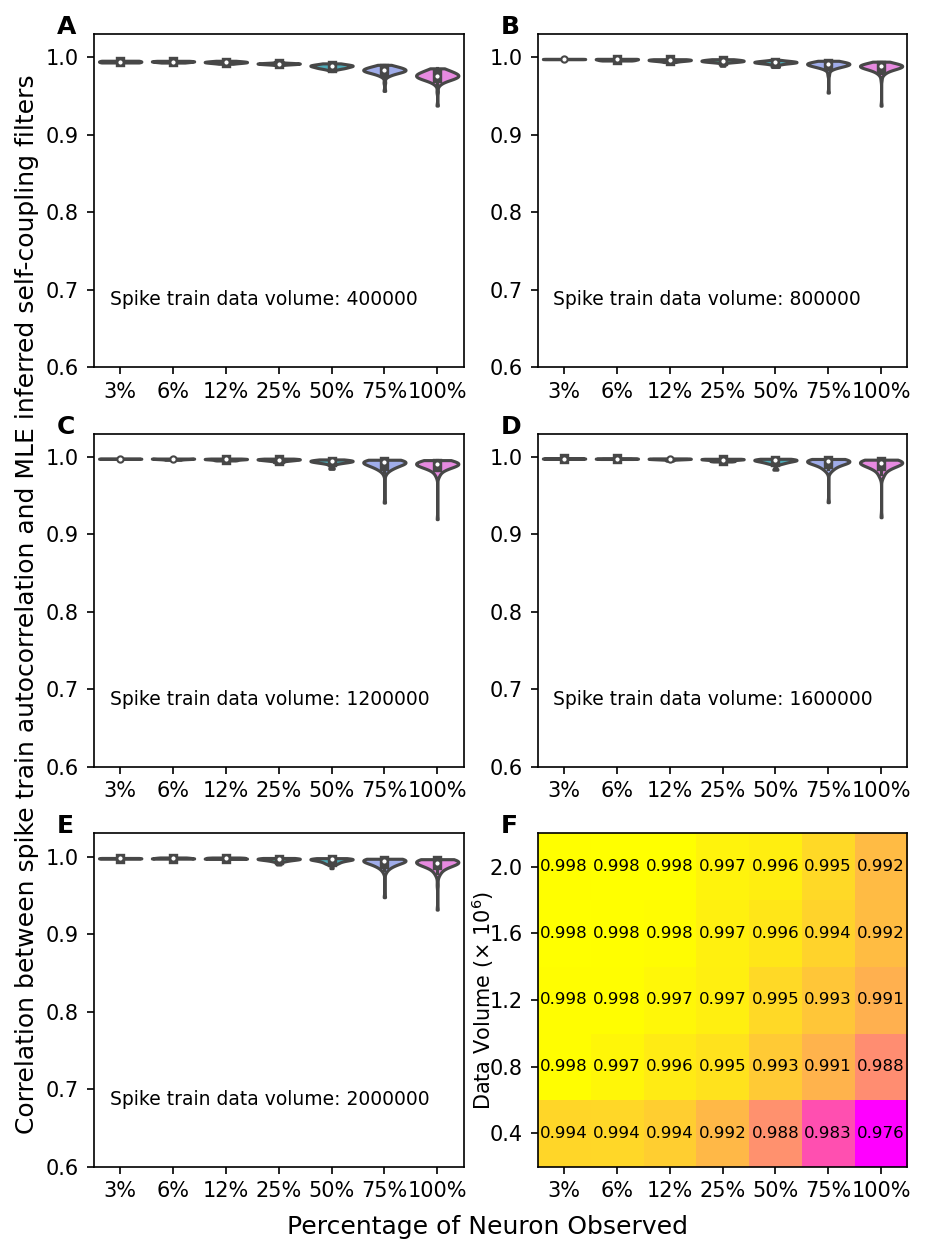

In [14]:
from figure import plot_correlation
# -1 diag, cov and cross-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag", \
                 filter_type="cross-coupling-random", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.6, 1.03], \
                 fig_name="cross_coupling_correlation_2m_-1_diag.pdf", \
                 savefig=False)

## -1 diag + 1.5 * weight matrix

In [3]:
w_true = np.loadtxt("./figure_data/weight_matrix_-1_diag_weight_1.5")

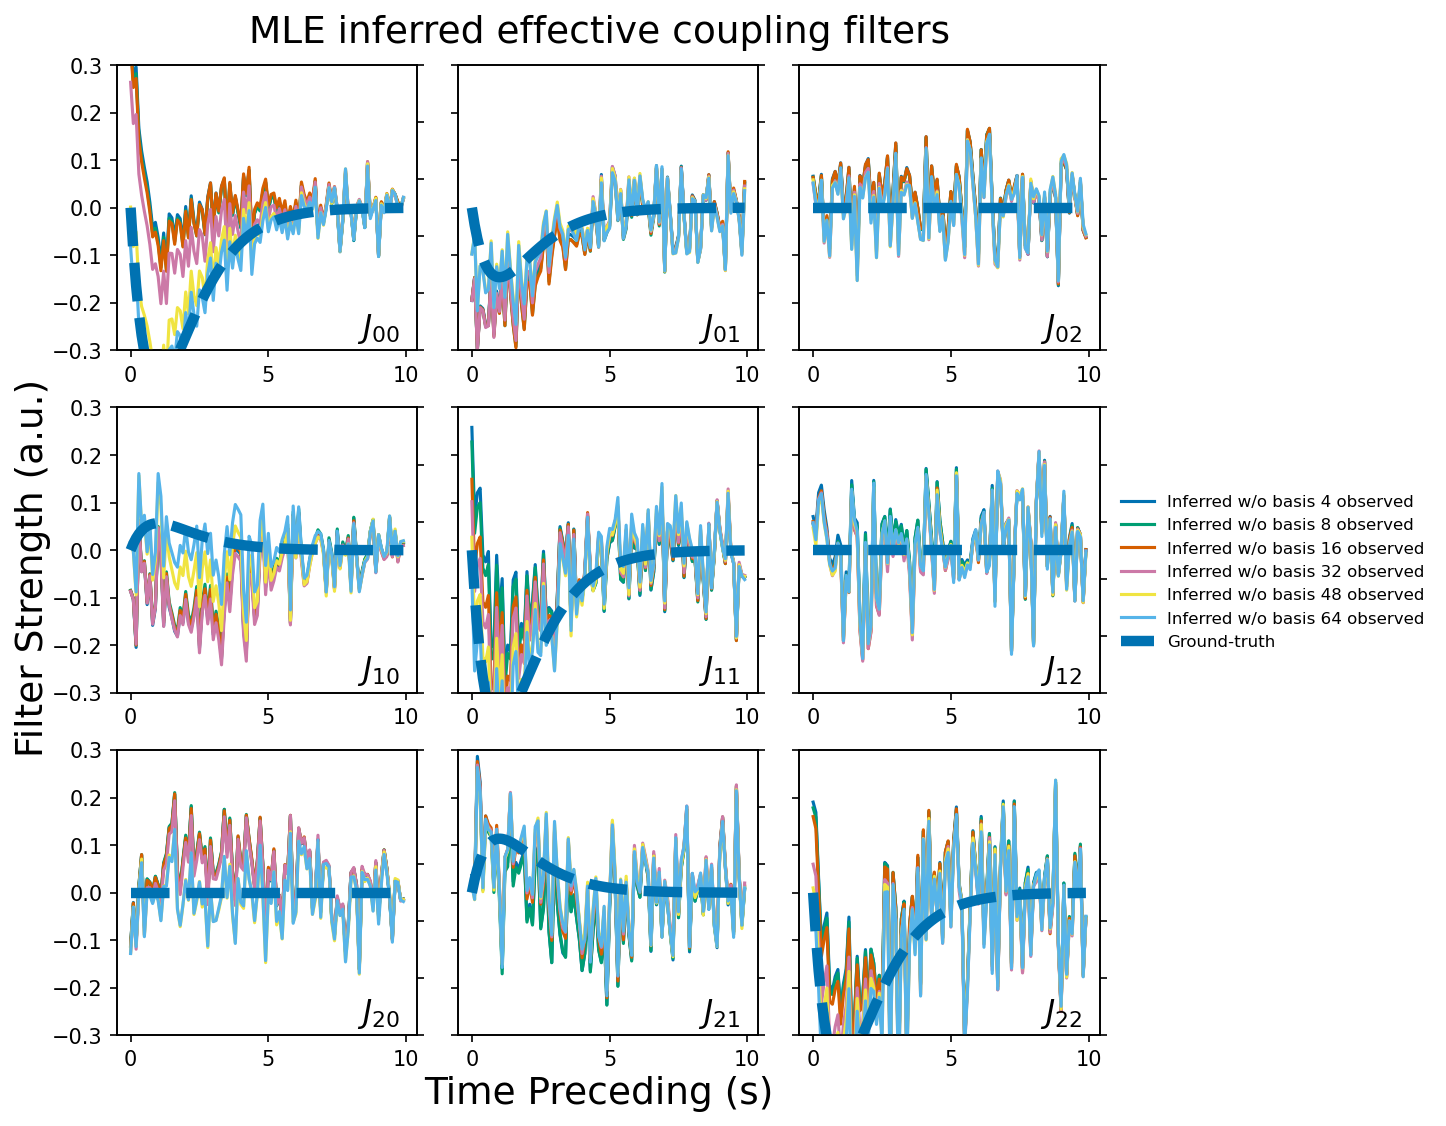

In [4]:
from figure import plot_mle_cov_vary_obs


plot_mle_cov_vary_obs(w_true, data_dir="Spk64_2m_Data_volume_obs_-1_diag_weight_1_5")

In [19]:
N, Nt = 64, 2000000
weight_factor = "1.5"
baseline = -2
dp = 1
spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_-1_diag_weight_{weight_factor}")

LOAD_DATA = True
obs = 3
if LOAD_DATA:
    print("Loading inferred filters...")
    inferred_no_basis_3_3 = [[] for _ in range(3)]
    inferred_with_basis_3_3 = [[] for _ in range(3)]
    for j in range(3):
        for i in range(3):
            inferred_no_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-11-30_MLE/J_{i}_{j}_3_observed_2000000_data_no_basis.txt"))
            inferred_with_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-11-30_MLE/J_{i}_{j}_3_observed_2000000_data_3_basis.txt"))
    print("Inferred filter loaded!")
else:
#     print("Loading spike train data...")
#     spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
#     print("Spike train loaded!")
    inferred_no_basis_3_3 = []
    inferred_with_basis_3_3 = []
    for N_j in range(obs):
        inferred_no_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8))
        inferred_with_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8))
        
# calculate correlation from spike train
from cov_mle import cov_parallel

# LOAD_DATA = False
obs = 3
if LOAD_DATA:
    cov_3_3 = [[] for _ in range(obs)]
    for j in range(3):
        for i in range(3):
            cov_3_3[j].append(np.loadtxt(f"./figure_data/2022-11-30_COV/cov_{i}_{j}_2000000"))
else:
    n_neuron = 3
    cov_parallel(spk_train.spike_train, neuron_pairs=[[i, j] for j in range(n_neuron) for i in range(n_neuron)], n_processes=9)

Loading inferred filters...
Inferred filter loaded!


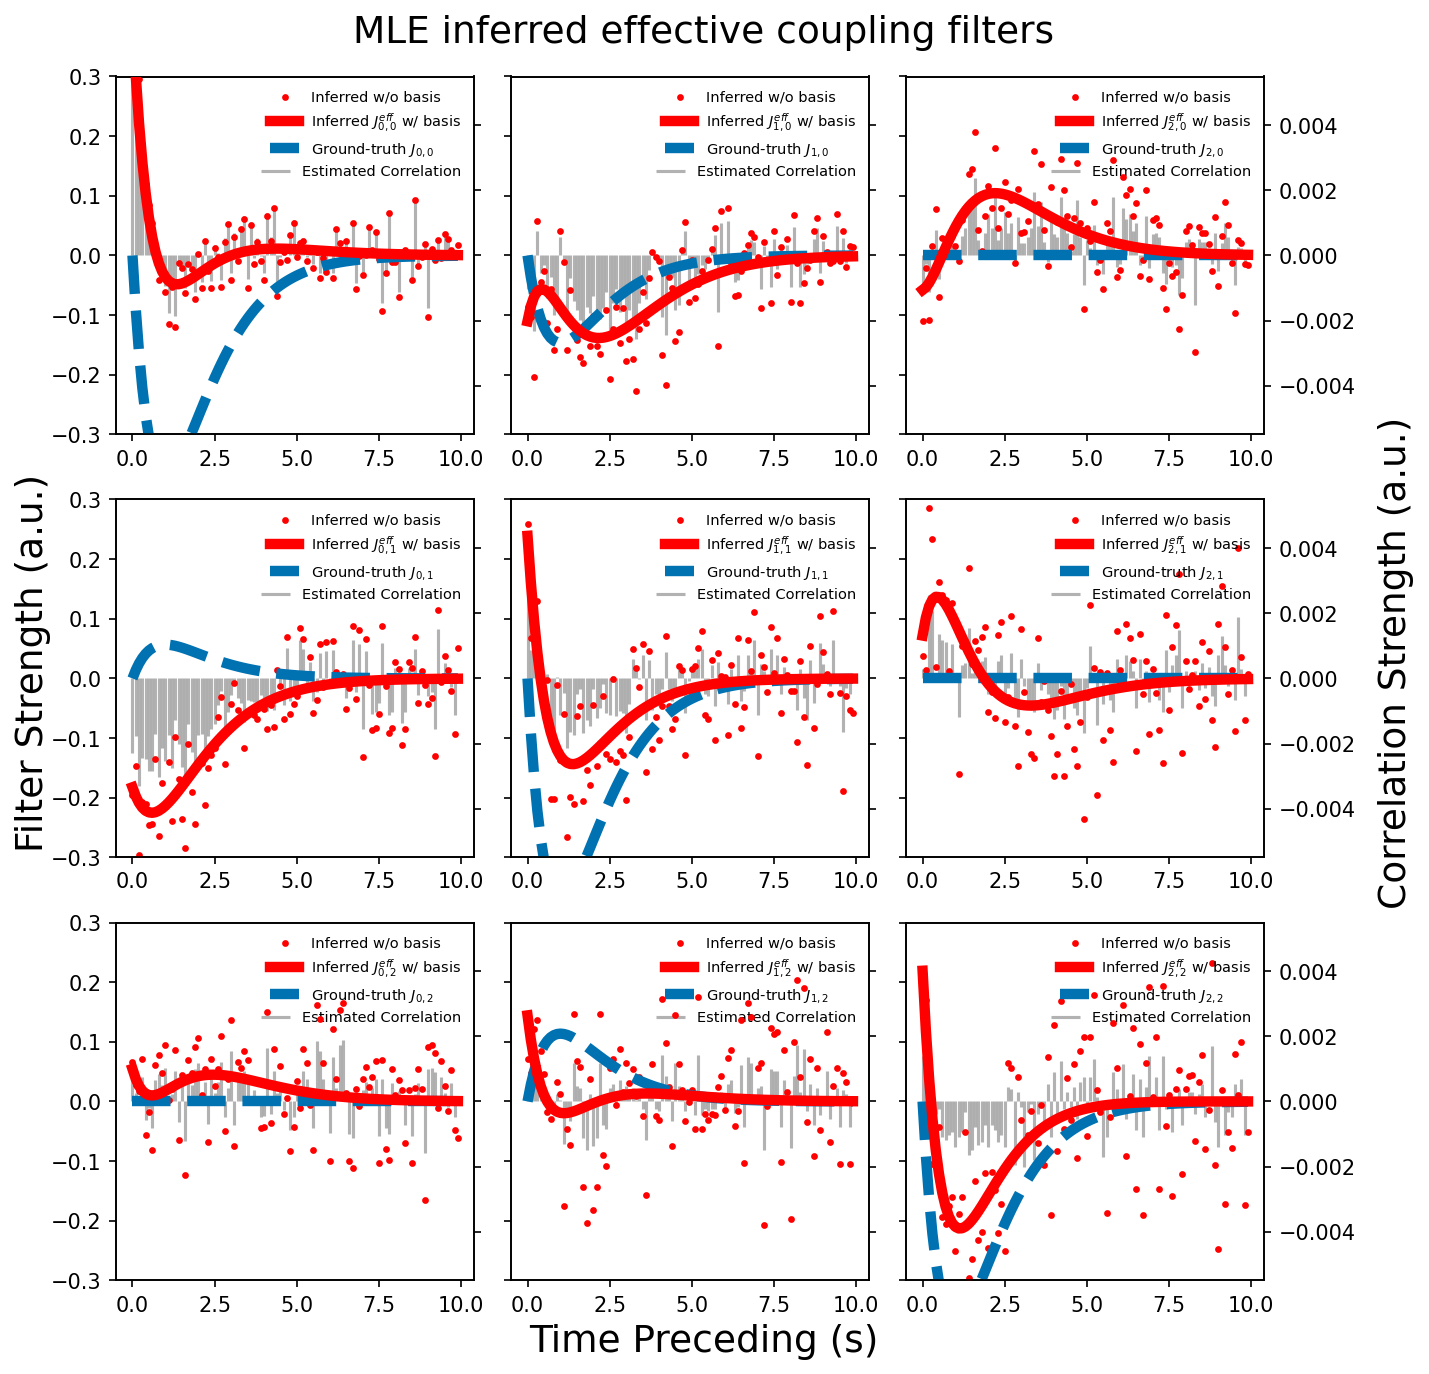

In [21]:
from figure import plot_mle_cov

# w_true = np.loadtxt("./figure_data/weight_matrix_ground_truth.txt")
w_true = spk_train.weight_matrix
plot_mle_cov(cov_3_3, inferred_with_basis_3_3, inferred_no_basis_3_3, w_true, savefig=False)

figure saved at './Figures/self_coupling_correlation_2m_-1_diag_weight_1_5.pdf'!


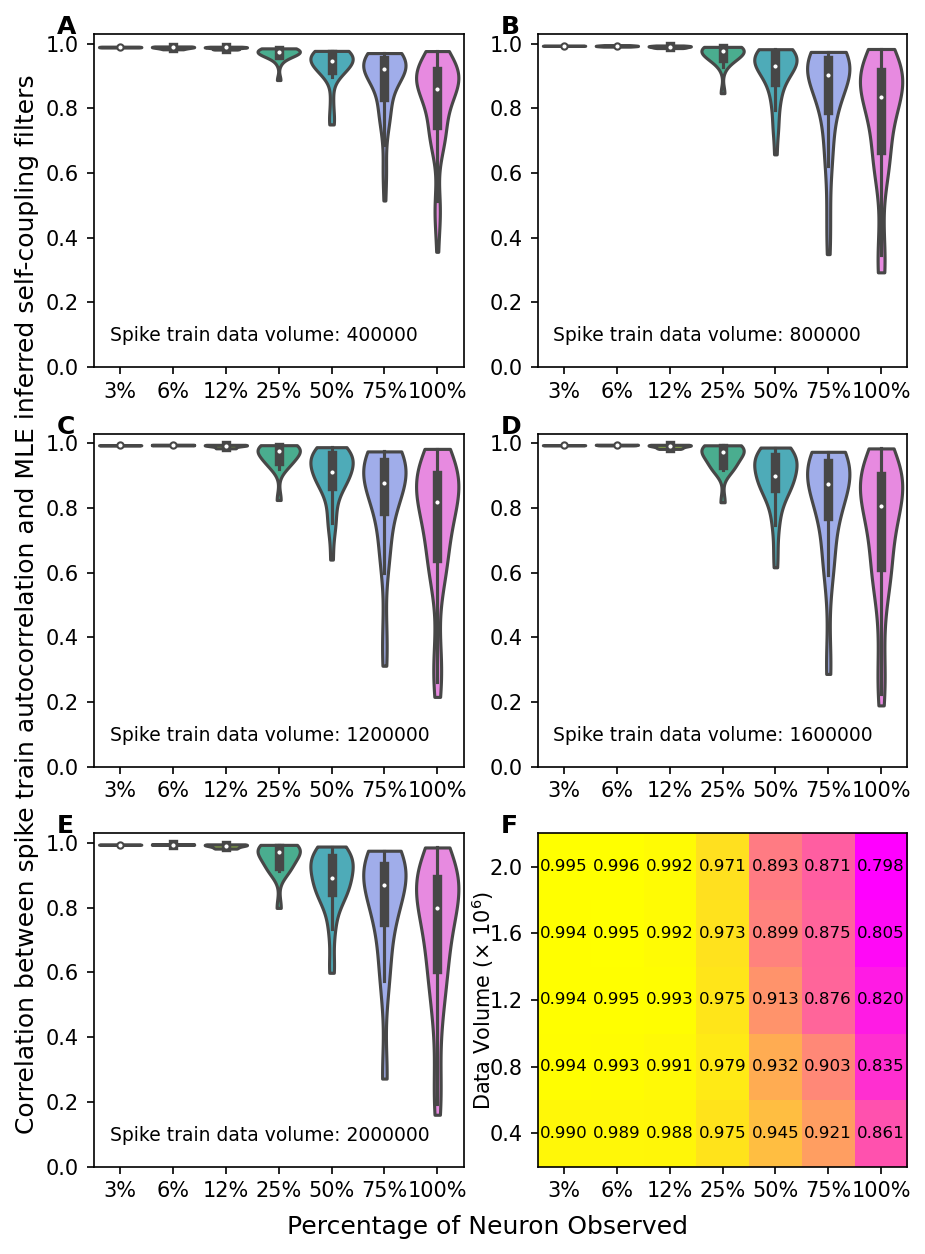

In [10]:
from figure import plot_correlation
# -1 diag, cov and self-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0, 1.03], \
                 fig_name="self_coupling_correlation_2m_-1_diag_weight_1_5.pdf", \
                 savefig=True)

figure saved at './Figures/cross_coupling_correlation_2m_-1_diag_weight_1_5.pdf'!


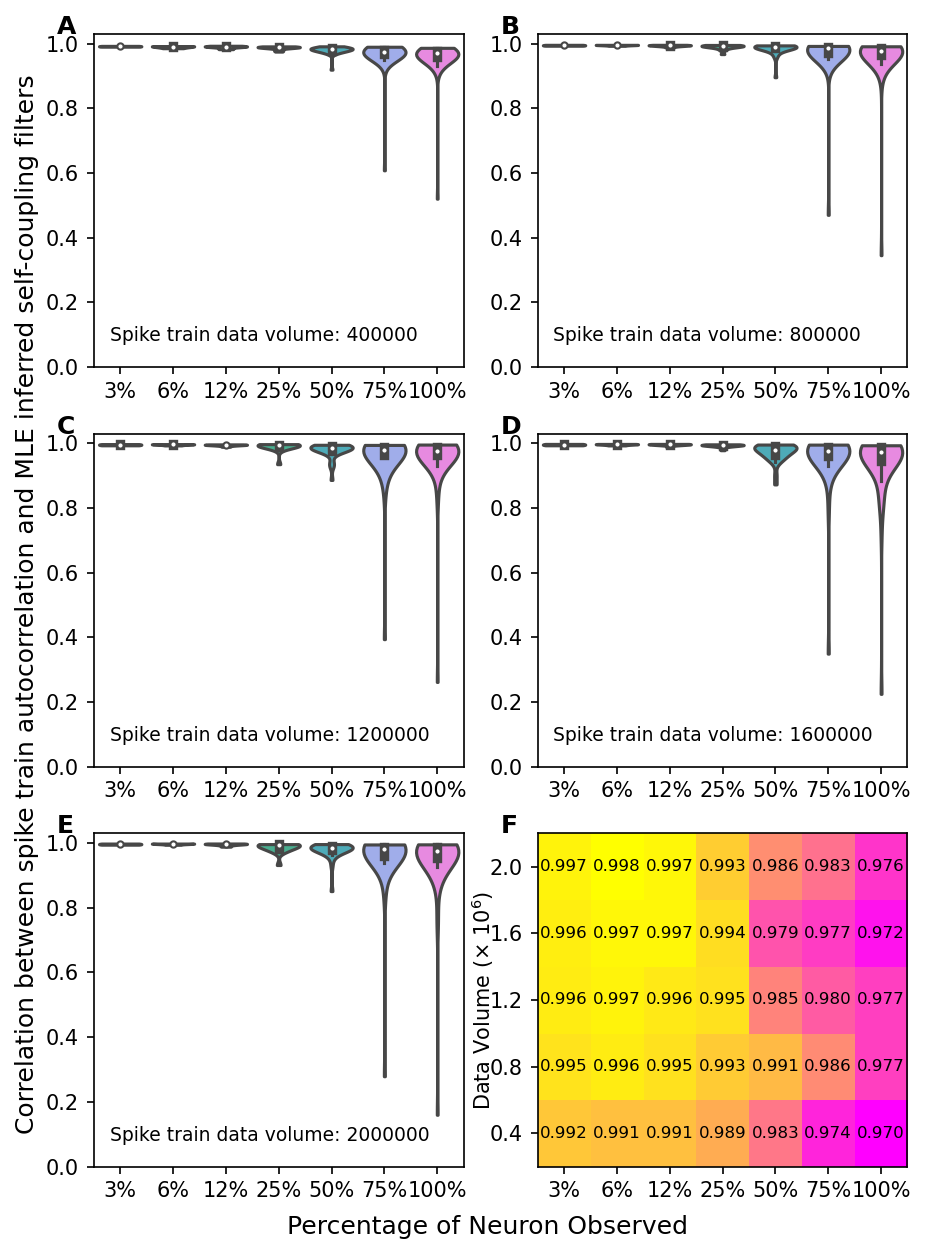

In [18]:
from figure import plot_correlation
# -1 diag, cov and cross-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_weight_1_5", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_weight_1_5", \
                 filter_type="cross-coupling-random", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0, 1.03], \
                 fig_name="cross_coupling_correlation_2m_-1_diag_weight_1_5.pdf", \
                 savefig=True)

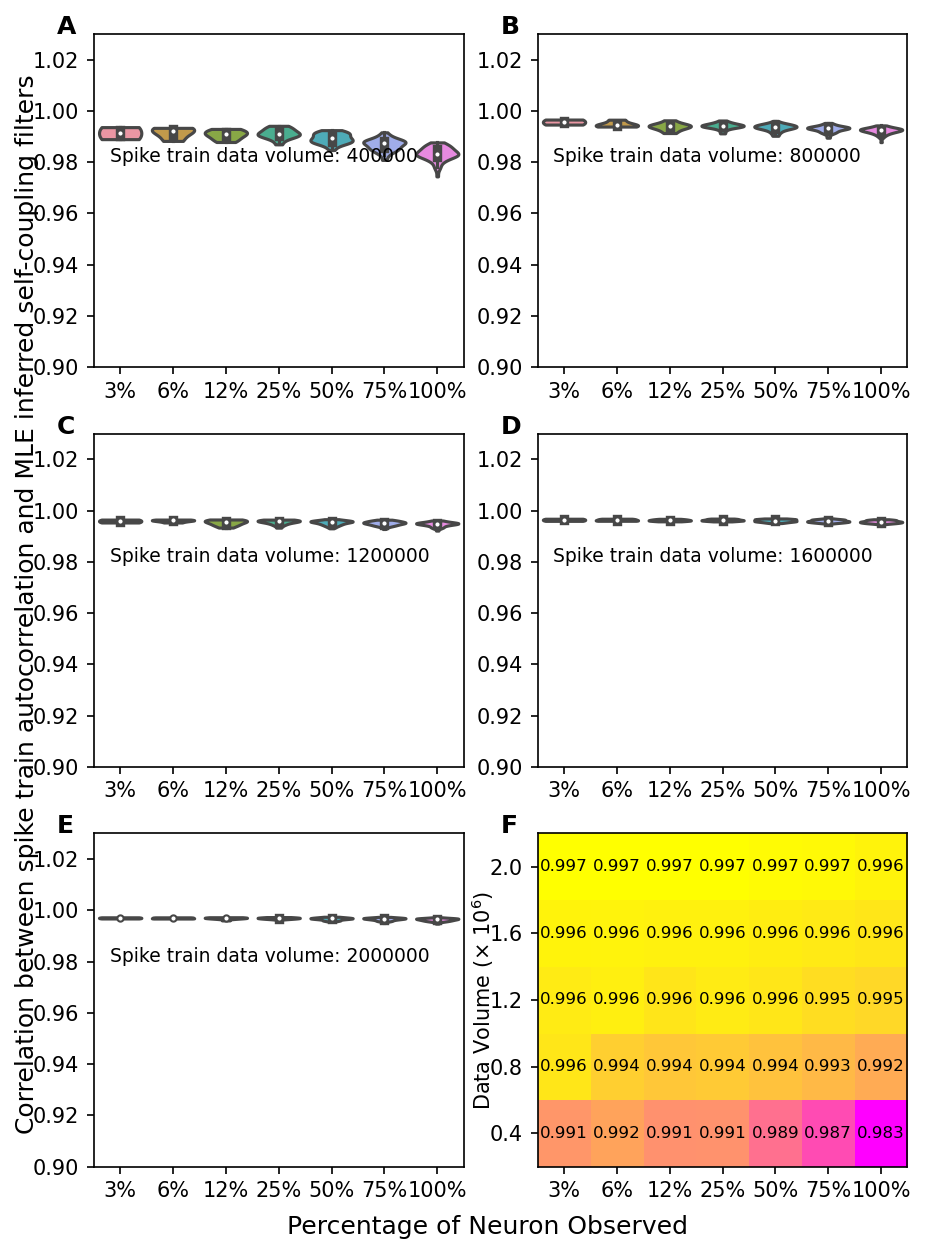

In [29]:
from figure import plot_correlation
# -1 diag, cov and self-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.9, 1.03], \
                 fig_name="self_coupling_correlation_2m_-1_diag_EI.pdf", \
                 savefig=False)

## EI network

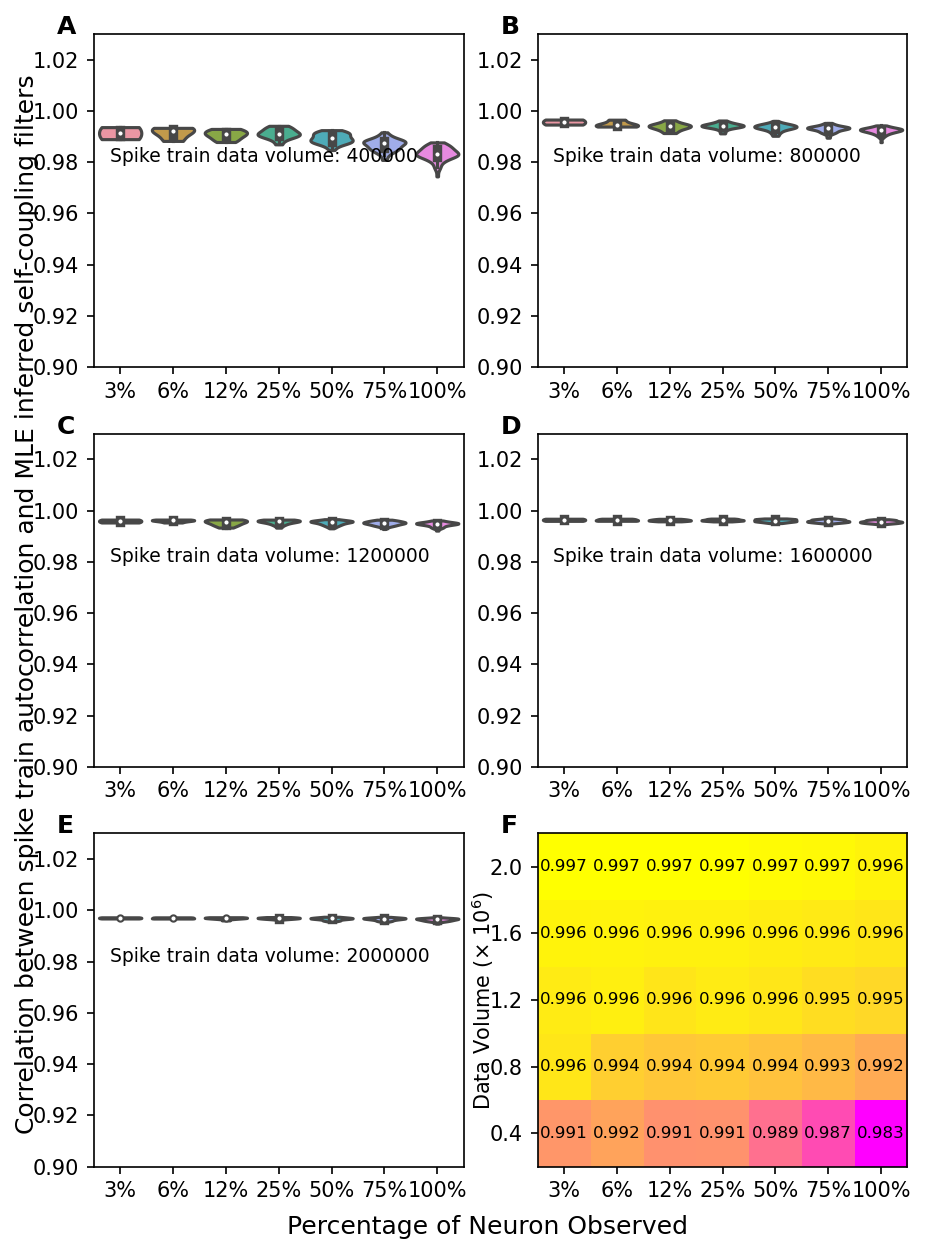

In [7]:
from figure import plot_correlation
# -1 diag, cov and self-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network", \
                 filter_type="self-coupling", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.9, 1.03], \
                 fig_name="self_coupling_correlation_2m_-1_diag_EI.pdf", \
                 savefig=False)

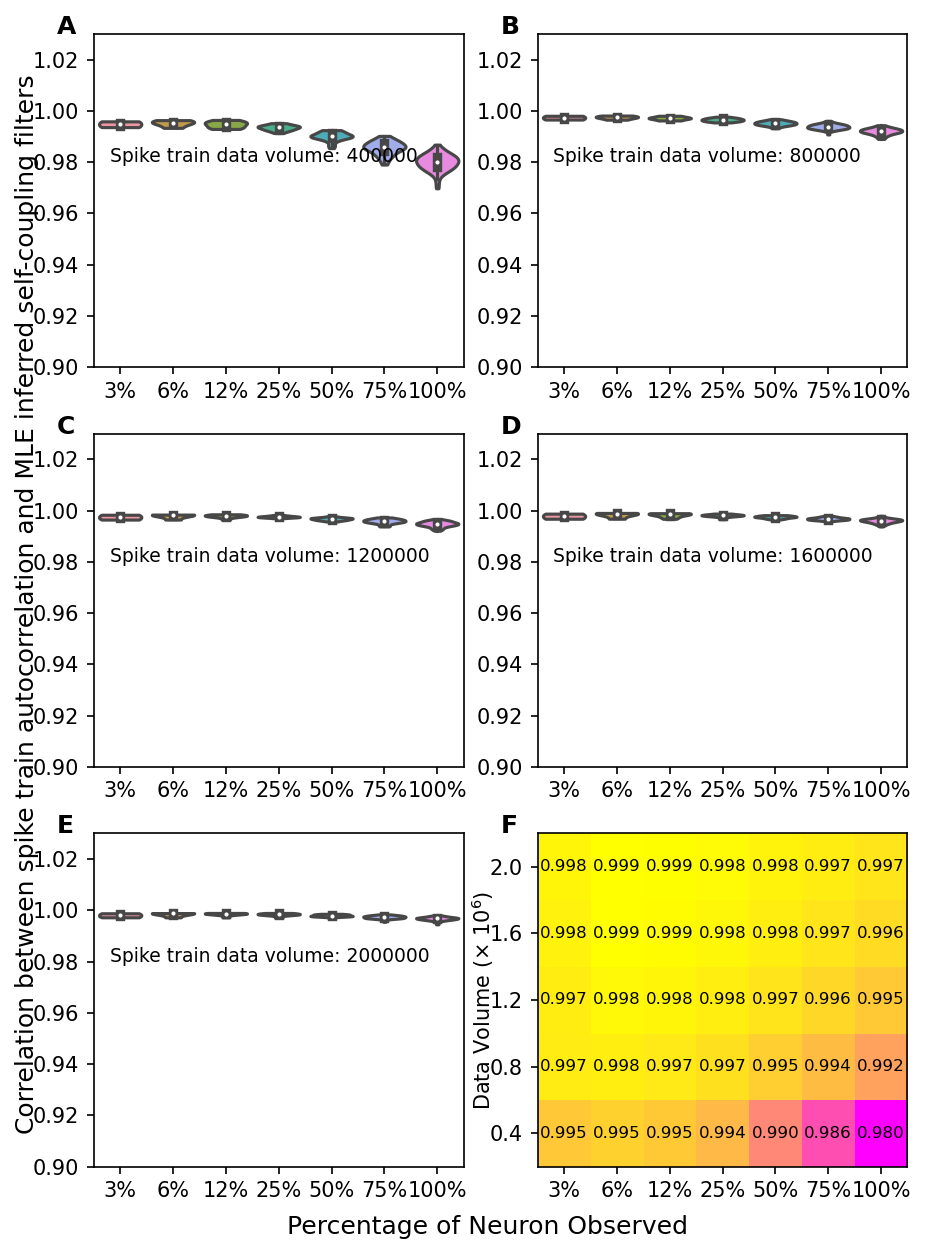

In [6]:
from figure import plot_correlation
# -1 diag, cov and cross-coupling filters; 2m data
plot_correlation(cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network", \
                 filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network", \
                 filter_type="cross-coupling-random", \
                 data_volume_percent=[0.2, 0.4, 0.6, 0.8, 1], \
                 total_data=2000000,\
                 ylim=[0.9, 1.03], \
                 fig_name="cross_coupling_correlation_2m_-1_diag_EI.pdf", \
                 savefig=False)

In [ ]:
# choose excitatory/inhibitory neuron pairs

## Figure 3. Gaussian process approximation explains (partially) the spike train covariance

## Figure 4. In strong interaction regime of the network: balanced network? Saturated nonlinearity

In [175]:
w_true = np.loadtxt("./figure_data/weight_matrix_ground_truth.txt")
w_true = w_true + np.diag([-1]*64)

In [29]:
# -1 on diagonal
N, Nt = 64, 2000000
N_i, N_j = 0, 0
obs = 3
print("Loading spike train data...")
spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_-1_diag")
w_true = spk_train.weight_matrix
print("Spike train loaded!")
dp=1

firing_mean = np.mean(spk_train.spike_train[:,:100000], 0)
inferred_no_basis_3_3 = []
inferred_with_basis_3_3 = []
for N_j in range(obs):
    inferred_no_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                               with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8))
    inferred_with_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                               with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8))

Loading spike train data...
Spike train loaded!
inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 16.79 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 13.17 s
inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 20.37 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 11.65 s
inferring with 2000000 data and 3 observed neurons without basis...
design shape: (2000000, 300)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 25.92 s
inferring with 2000000 data and 3 observed neurons with basis order [0, 1, 2]...
Time took for MLE 10.96 s


In [248]:
np.mean(firing_mean/0.1)

0.32862226562499997

In [244]:
from theory import rates_ss
w_true = w_true + np.diag([1]*64)
np.mean(rates_ss(w_true, b=-2))

0.13813032168363043

In [254]:
np.exp(-1)

0.36787944117144233

In [30]:
n_neuron = 3
cov_parallel(spk_train.spike_train, neuron_pairs=[[i, j] for j in range(n_neuron) for i in range(n_neuron)], dp=1, n_processes=9)
cov_3_3 = [[] for _ in range(obs)]
for j in range(3):
    for i in range(3):
        cov_3_3[j].append(np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance/cov_{i}_{j}_2000000"))


9 covariance will be estimated for 64 neurons
1


  0%|          | 0/1 [00:00<?, ?it/s]

[[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2]]
correlation [0, 0] estimation with 2000000 data...
correlation [1, 0] estimation with 2000000 data...
correlation [2, 0] estimation with 2000000 data...
correlation [0, 1] estimation with 2000000 data...
correlation [1, 1] estimation with 2000000 data...
correlation [2, 1] estimation with 2000000 data...
correlation [0, 2] estimation with 2000000 data...
correlation [1, 2] estimation with 2000000 data...
correlation [2, 2] estimation with 2000000 data...
Time took for covariance estimation 62.34 s
Time took for covariance estimation 62.52 s
Time took for covariance estimation 62.88 s
Time took for covariance estimation 61.92 s
Time took for covariance estimation 61.61 s
Time took for covariance estimation 63.32 s
Time took for covariance estimation 60.87 s
Time took for covariance estimation 63.94 s
Time took for covariance estimation 64.94 s


100%|██████████| 1/1 [01:16<00:00, 76.25s/it]


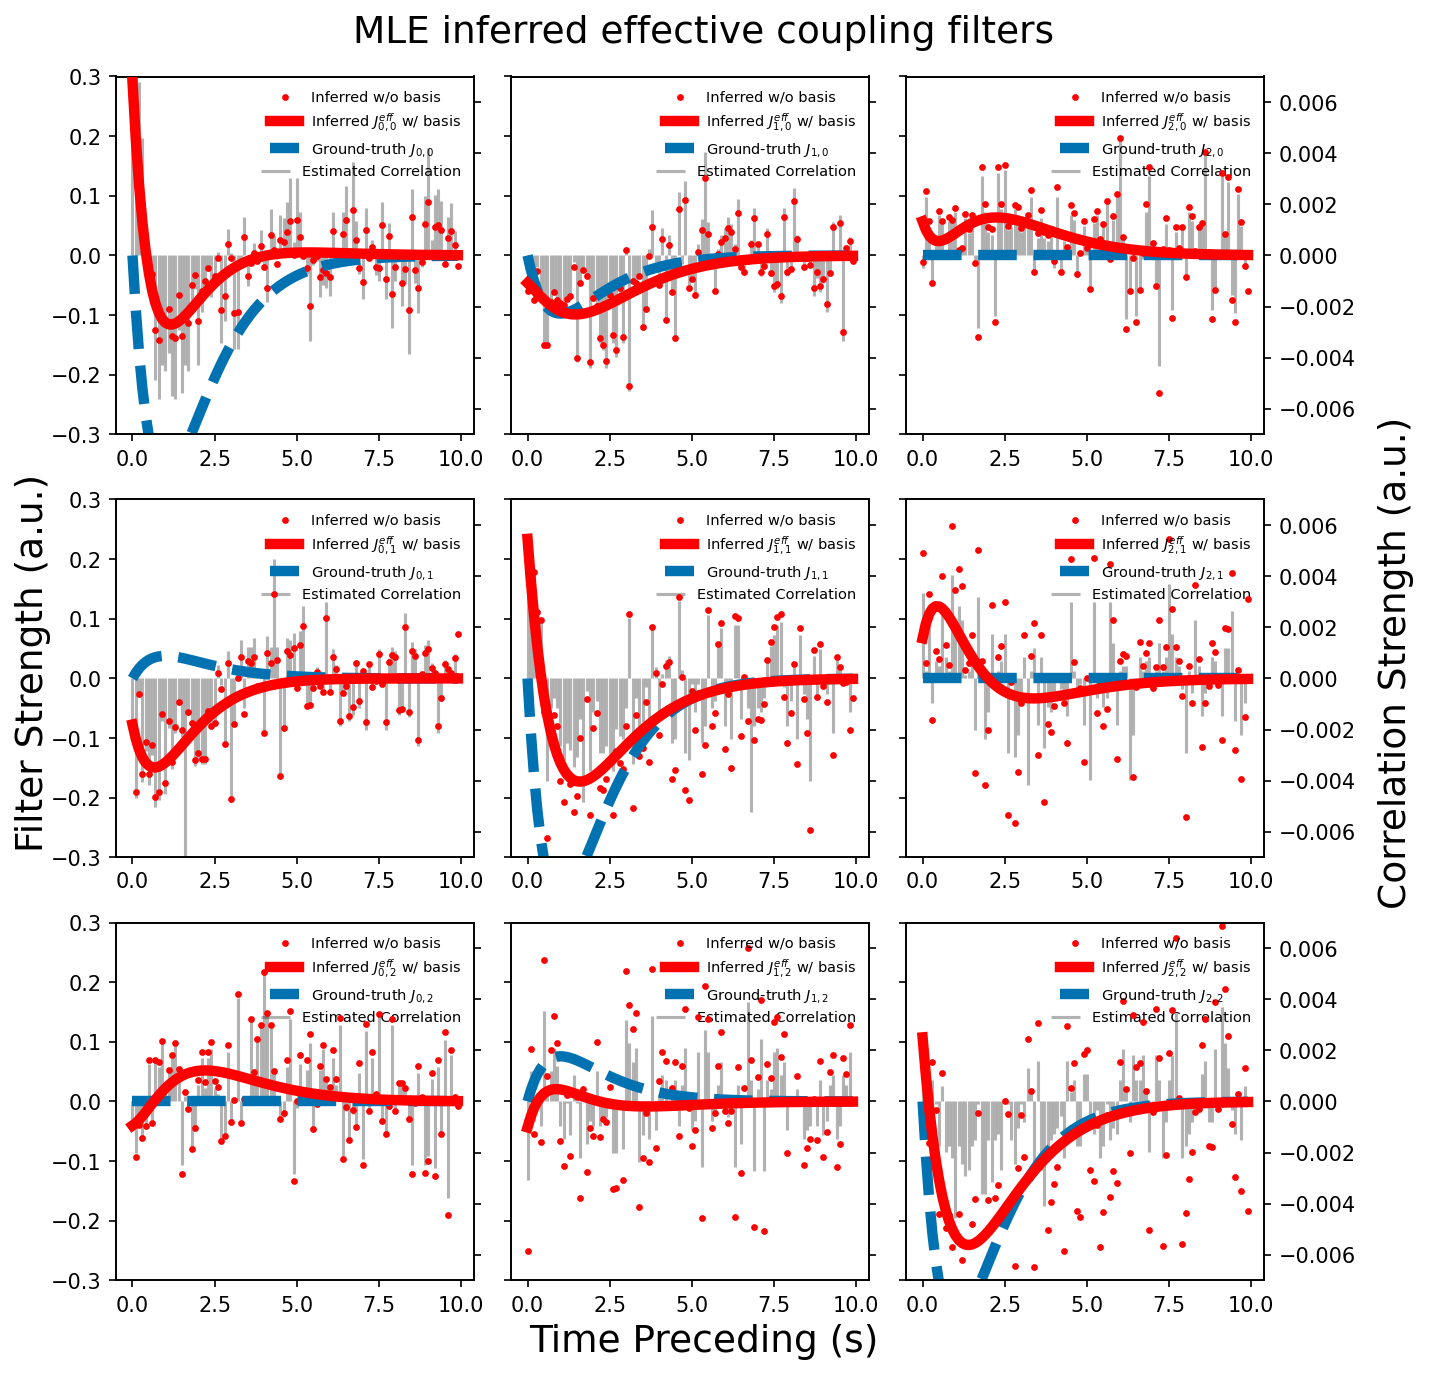

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9), dpi=150)
filter_length = 100
dt = 0.1
observed = [0, 1, 2]
for j in range(3):
    for i in range(3):
        ax2 = axs[i, j].twinx()
        axs[i, j].vlines(np.arange(filter_length)[:-1] * dt, 0, cov_3_3[i][j][1:], color='black',alpha=0.3, label="Estimated Correlation", zorder=0)
        axs[i, j].set_ylim(-0.007, 0.007)
#         axs[i, j].set_axisbelow(True)
        axs[i, j].yaxis.tick_right()

        axs[i, j].legend(bbox_to_anchor=(1, 0.79),frameon=False, loc="upper right", prop={'size': 7})

        ax2.scatter(np.arange(filter_length) * dt, inferred_no_basis_3_3[i][j], s=5, color='red', label="Inferred w/o basis")
        
        ax2.plot(np.arange(filter_length) * dt, inferred_with_basis_3_3[i][j], linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(observed[j], observed[i]), color='red', zorder=100)
        ax2.set_ylim(-0.3, 0.3)
        alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
        ax2.plot(np.arange(filter_length) * dt,
                       alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(observed[j], observed[i]))
        ax2.yaxis.tick_left()
#         if legend:
        handles, labels = ax2.get_legend_handles_labels()
        order = [2, 0, 1]
        ax2.legend([handles[idx] for idx in order], [
                         labels[idx] for idx in order], frameon=False, loc="upper right", prop={'size': 7})
        if j < 2:
            axs[i, j].set_yticklabels([])
#         if i < 2:
#             ax2.set_xticklabels([])
        if j > 0:
            ax2.set_yticklabels([])
    # plt.text(0,1,'Time',size=15)
        # ax2.set_ylabel('Filter Strength',size=15)
fig.suptitle('MLE inferred effective coupling filters', size=18)
fig.text(0.5, -0.01, 'Time Preceding (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Filter Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.text(1.00, 0.5, 'Correlation Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.tight_layout()
# if savefig:
#     fig.savefig(f'./Figures/MLE_COV.pdf', bbox_inches="tight")
#     print("figure saved!")


In [195]:
w_true

array([[-0.        ,  0.10284459, -0.        , ..., -0.43606184,
         0.        ,  0.        ],
       [-0.26484709,  0.        ,  0.20594949, ...,  0.11785865,
         0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.50739335,
        -0.13765611,  0.        ],
       ...,
       [-0.46598976,  0.27447241, -0.        , ...,  0.        ,
        -0.        ,  0.11254828],
       [ 0.        , -0.        , -0.68212663, ...,  0.36966826,
        -0.        , -0.83288497],
       [-0.09080155,  0.        , -0.26179423, ...,  0.        ,
        -0.3145699 , -0.        ]])

In [24]:
# from figure import plot_mle_cov
# inferred_with_basis_3_3 = 

cov_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance_EI_network"
filter_path="/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_EI_network"
w_true = np.loadtxt("/home/tong/hidden-neuron-simulation/src/E-I-network/e-i-weight_64.txt")
inferred_no_basis_3_3 = [[] for _ in range(3)]
cov_3_3 = [[] for _ in range(3)]
obs = [0, 1, 3]
for i in range(3):
    for j in range(3):
        N_i = obs[i]
        N_j = obs[j]
        inferred_no_basis_3_3[i].append(np.loadtxt(os.path.join(filter_path, f"J_{N_i}_{N_j}_64_observed_2000000_data_no_basis.txt")))
        cov_3_3[i].append(np.loadtxt(os.path.join(cov_path, f"cov_{N_i}_{N_j}_2000000")))
# plot_mle_cov(inferred_with_basis_3_3, inferred_no_basis_3_3, w_true, savefig=False)

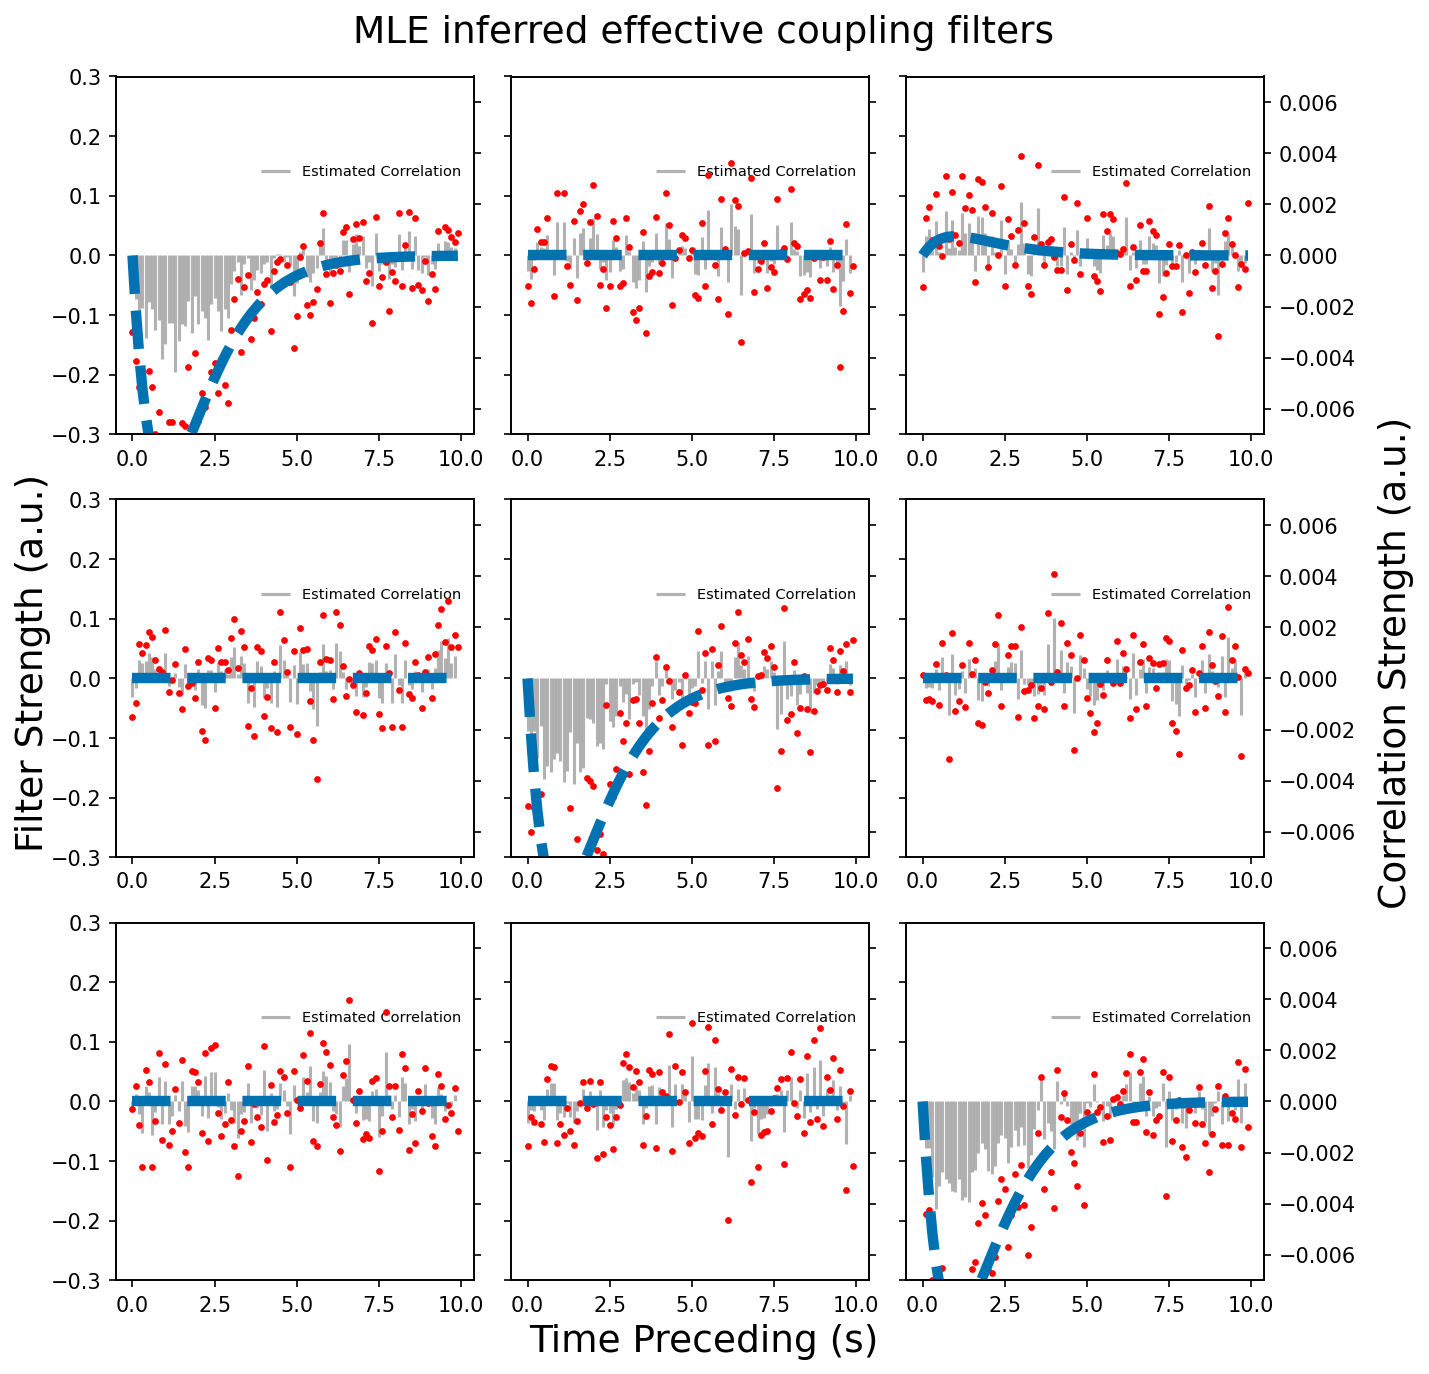

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9), dpi=150)
filter_length = 100
dt = 0.1
observed = [0, 1, 3]
for j in range(3):
    for i in range(3):
#         N_i = obs[i]
#         N_j = obs[j]
        ax2 = axs[i, j].twinx()
        axs[i, j].vlines(np.arange(filter_length)[:-1] * dt, 0, cov_3_3[i][j][1:], color='black',alpha=0.3, label="Estimated Correlation", zorder=0)
        axs[i, j].set_ylim(-0.007, 0.007)
#         axs[i, j].set_axisbelow(True)
        axs[i, j].yaxis.tick_right()

        axs[i, j].legend(bbox_to_anchor=(1, 0.79),frameon=False, loc="upper right", prop={'size': 7})

        ax2.scatter(np.arange(filter_length) * dt, inferred_no_basis_3_3[i][j], s=5, color='red', label="Inferred w/o basis")
        
#         ax2.plot(np.arange(filter_length) * dt, inferred_with_basis_3_3[i][j], linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(observed[j], observed[i]), color='red', zorder=100)
        ax2.set_ylim(-0.3, 0.3)
        alpha_filter = [w_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
        ax2.plot(np.arange(filter_length) * dt,
                       alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(observed[j], observed[i]))
        ax2.yaxis.tick_left()
#         if legend:
        handles, labels = ax2.get_legend_handles_labels()
        order = [2, 0, 1]
#         ax2.legend([handles[idx] for idx in order], [
#                          labels[idx] for idx in order], frameon=False, loc="upper right", prop={'size': 7})
        if j < 2:
            axs[i, j].set_yticklabels([])
#         if i < 2:
#             ax2.set_xticklabels([])
        if j > 0:
            ax2.set_yticklabels([])
    # plt.text(0,1,'Time',size=15)
        # ax2.set_ylabel('Filter Strength',size=15)
fig.suptitle('MLE inferred effective coupling filters', size=18)
fig.text(0.5, -0.01, 'Time Preceding (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Filter Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.text(1.00, 0.5, 'Correlation Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.tight_layout()
# if savefig:
#     fig.savefig(f'./Figures/MLE_COV.pdf', bbox_inches="tight")
#     print("figure saved!")


In [8]:
cov_0_0 = np.loadtxt("/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag_covariance/cov_0_0_400000")

In [9]:
filter_0_0 = np.loadtxt("/home/tong/hidden-neuron-simulation/data/Spk64_2m_Data_volume_obs_-1_diag/J_0_0_2_observed_400000_data_no_basis.txt")

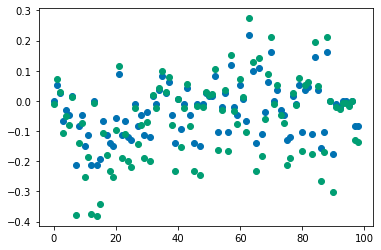

In [16]:
plt.scatter(range(99),cov_0_0[1:]*50)
plt.scatter(range(99),filter_0_0[:-1])

## Figure 5. Causal inference by stimulating some neurons

## Appendix Figure 1. random sampling of the network: 3 sampling of the 32 neuron in a 64 neuron network

Text(0.5, 0.08, 'Percentage of Neuron Observed')

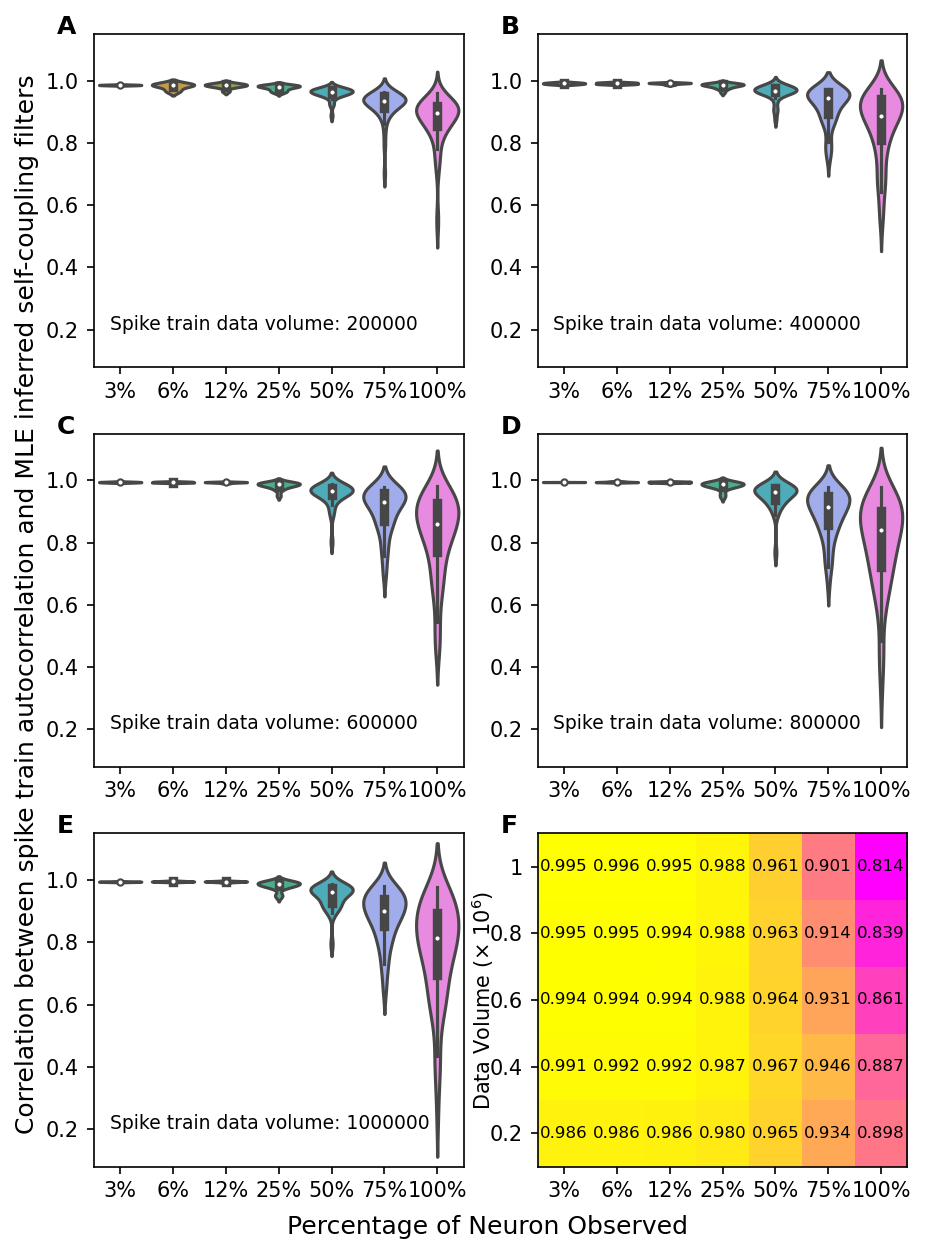

In [10]:
import matplotlib.pyplot as plt
from filter_inference import calculate_corr_all
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(7, 10), dpi=150)

corr_per_dp_median = []
corr_per_dp_mean = []
for j, dp in enumerate([0.2, 0.4, 0.6, 0.8, 1]):
    corr_per_observed = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
#     print(corr_per_observed)
    for N in [i for i in range(64)]:
        N_i, N_j = N, N
#         print(N_i, N_j)
#         if dp == 1:
#             corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
#         else:
        corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-10-04", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)

        for k, v in corr.items():
            corr_per_observed[k].append(v)

    sns.violinplot(data=[np.array(corr_per_observed[i]) for i in [2, 4, 8, 16, 32, 48, 64]], scale='width', ax=axs[j//2, j%2])
    axs[j//2, j%2].set_ylim([0.08, 1.15])
    axs[j//2, j%2].set_xticklabels([f"{i/64:.0%}" for i in [2, 4, 8, 16, 32, 48, 64]])
    axs[j//2, j%2].text(-0.2, 0.2, f"Spike train data volume: {int(dp*1000000)}", size=9)
    axs[j//2, j%2].text(-0.1, 1.0, string.ascii_uppercase[j], transform=axs[j//2, j%2].transAxes,
                         size=12, weight='bold')
#     if j//2 == 2:
#         axs[j//2, j%2].set_xlabel("Percentage of Neuron Observed")
    corr_per_dp_median.append([np.median(corr) for corr in corr_per_observed.values()])
    corr_per_dp_mean.append([np.mean(corr) for corr in corr_per_observed.values()])
extent = [-0.5, 6.5, -0.5, 4.5]
im = axs[2,1].imshow(np.array(corr_per_dp_median), extent=extent, origin='lower', aspect='auto',cmap=cm.get_cmap('spring'))
# ax.colorbar()
axs[2,1].text(-1.8,2, "Data Volume ($\\times$ $10^6$)", va='center', rotation='vertical')
# axs[2,1].set_xlabel("Percentage of Neuron Observed")
axs[2,1].set_xticks(np.arange(7))
axs[2,1].set_xticklabels([f"{i/64:.0%}" for i in [2, 4, 8, 16, 32, 48, 64]])

axs[2,1].set_yticks(np.arange(5))
axs[2,1].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
axs[2,1].text(-0.1, 1.0, "F", transform=axs[2,1].transAxes,
                         size=12, weight='bold')
jump_x = 7 / (1 * 7)
jump_y = 1 / (1 * 5)

x_positions = np.linspace(start=-1, stop=6, num=7, endpoint=False)
y_positions = np.linspace(start=-0.2, stop=4.8, num=5, endpoint=False)
for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = f"{np.array(corr_per_dp_median)[y_index, x_index]:.3f}"
        text_x = x + jump_x
        text_y = y + jump_y
        axs[2,1].text(text_x, text_y, label, color='black', ha='center', va='center',size=8)

# axs[2,1].set_title("Correlation of inferred filter and spike train correlation", size=10)
# plt.colorbar(im, ticks=np.linspace(0.75, 1, 11), ax=axs[2,1])
fig.text(0.05, 0.5, "Correlation between spike train autocorrelation and MLE inferred self-coupling filters", va='center', rotation='vertical', size=12)
fig.text(0.5, 0.08, "Percentage of Neuron Observed", ha='center', size=12)

In [18]:
import numpy as np
w_true = np.loadtxt("/home/tong/hidden-neuron-simulation/src/figure_data/weight_matrix_ground_truth.txt")

In [25]:
w_true

array([[-0.        ,  0.10284459, -0.        , ..., -0.43606184,
         0.        ,  0.        ],
       [-0.26484709,  0.        ,  0.20594949, ...,  0.11785865,
         0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.50739335,
        -0.13765611,  0.        ],
       ...,
       [-0.46598976,  0.27447241, -0.        , ...,  0.        ,
        -0.        ,  0.11254828],
       [ 0.        , -0.        , -0.68212663, ...,  0.36966826,
        -0.        , -0.83288497],
       [-0.09080155,  0.        , -0.26179423, ...,  0.        ,
        -0.3145699 , -0.        ]])

In [26]:
w_true_zero = [[idx for idx, i in enumerate(w_true[j,:]) if i == 0] for j in range(w_true.shape[0])]